In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(columns=['customerID'], inplace=True)

<Figure size 1000x600 with 0 Axes>

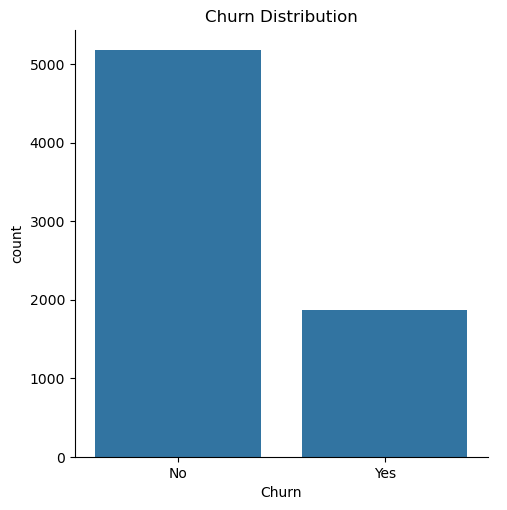

In [5]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Churn', data=df, kind='count')
plt.title('Churn Distribution') 
plt.show()

In [6]:
%pip install category_encoders
from category_encoders import TargetEncoder

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
te = TargetEncoder(cols=cat_cols)
df[cat_cols] = te.fit_transform(df[cat_cols], df['Churn'])

  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl (11.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [category_encoders]
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

scaler = StandardScaler()

col2scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in col2scale:
    df[col] = scaler.fit_transform(df[[col]])

l1 = [x for x in df.columns if x not in ['Churn', 'MultipleLines']]


sdf1 = df[l1]

train_x, test_x, train_y , test_y =  train_test_split(sdf1, df['Churn'], test_size=0.2, random_state=42,stratify=df['Churn'])

================================== SVM ==================================
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.98      0.97      0.97       374

    accuracy                           0.99      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.99      0.99      0.99      1409



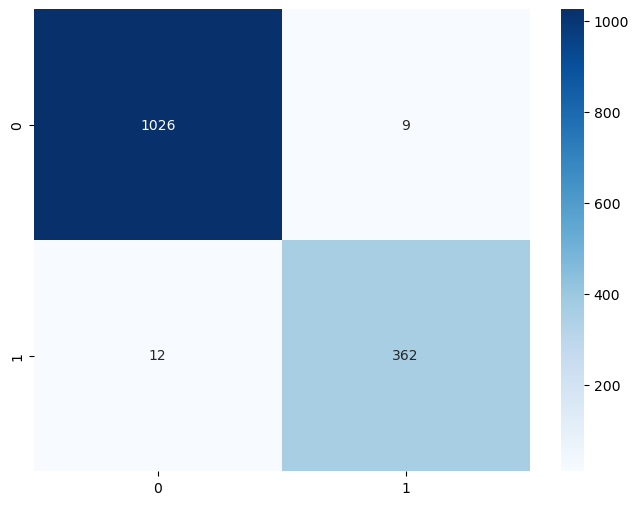

================================== Random Forest ==================================
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.97      0.96      0.96       374

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409

================================== XGBoost ==================================


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:48:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1035
           1       0.96      0.96      0.96       374

    accuracy                           0.98      1409
   macro avg       0.97      0.97      0.97      1409
weighted avg       0.98      0.98      0.98      1409



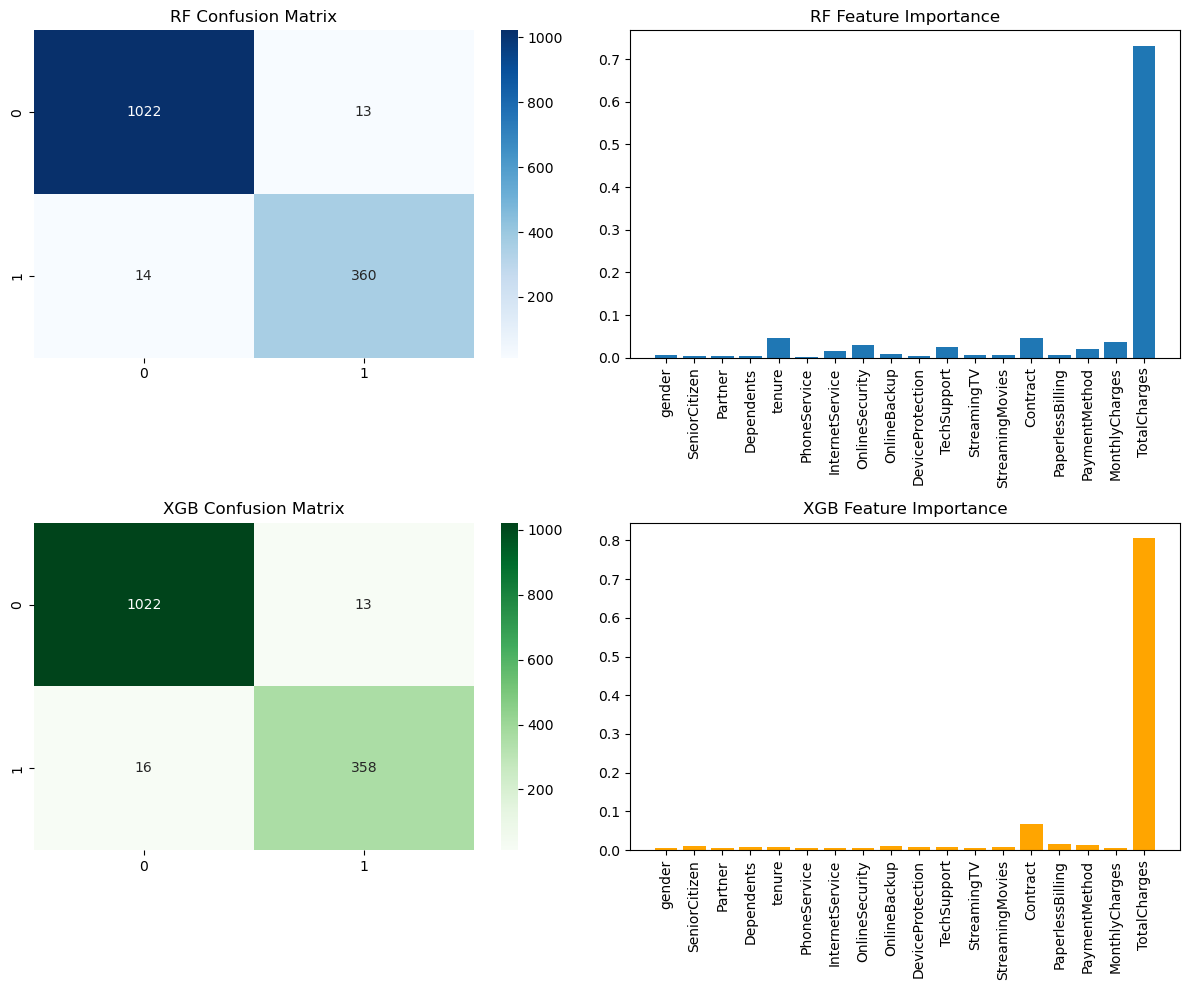

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

svm = SVC()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

svm.fit(train_x, train_y)
rf.fit(train_x, train_y)

y_pred_svm = svm.predict(test_x)
y_pred_rf = rf.predict(test_x)

print('================================== SVM ==================================')
print(classification_report(test_y, y_pred_svm))
cm = confusion_matrix(test_y, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

print('================================== Random Forest ==================================')
print(classification_report(test_y, y_pred_rf))
cm_rf = confusion_matrix(test_y, y_pred_rf)


print('================================== XGBoost ==================================')
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(train_x, train_y)
y_pred_xgb = xgb.predict(test_x)

print(classification_report(test_y, y_pred_xgb))
cm_xgb = confusion_matrix(test_y, y_pred_xgb)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# RF Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('RF Confusion Matrix')

# RF Feature Importance
importances_rf = rf.feature_importances_
axes[1].bar(range(len(importances_rf)), importances_rf, tick_label=l1)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('RF Feature Importance')

# XGB Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('XGB Confusion Matrix')

# XGB Feature Importance
importances_xgb = xgb.feature_importances_
axes[3].bar(range(len(importances_xgb)), importances_xgb, color='orange', tick_label=l1)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_title('XGB Feature Importance')

plt.tight_layout()
plt.show()
